In [1]:
from statsmodels.api import datasets
iris = datasets.get_rdataset("iris")
iris.data.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris.data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## K Nearest Neighbors Machine Learning model

In [2]:
import pandas as pd
from sklearn import datasets #Get sample datasets from scikit

iris = datasets.load_iris()

#Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species
print(iris)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

In [3]:
#Examine the data types in the dataset
iris.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [4]:
#Find the count of each unique species.
iris['count'] = 1
iris[['Species', 'count']].groupby('Species').count() 

,count
Species,
setosa,50
versicolor,50
virginica,50


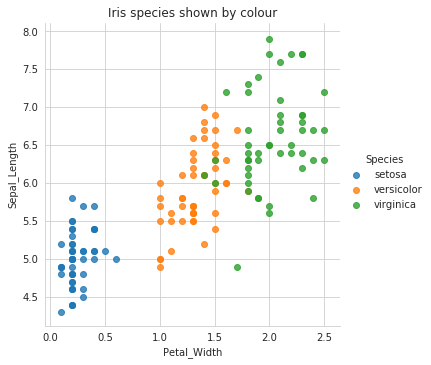

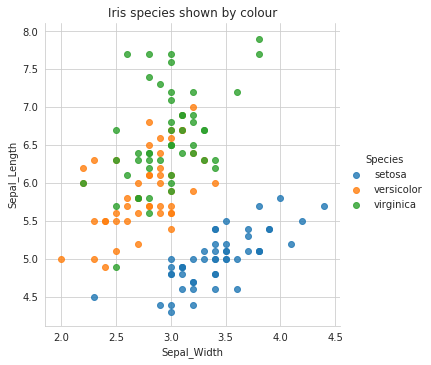

In [5]:
%matplotlib inline
def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style("whitegrid")
    sns.lmplot(x= col1, y = col2, data = iris, hue = "Species", fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by colour')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')

## Prepare the Data Set before we train our KNN Model

In [6]:
# Scale the data set to avoid biases in training the model
from sklearn.preprocessing import scale
import pandas as pd
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
iris_scaled = scale(iris[num_cols]) #Scaling only the numerical columns of the data set
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols) #Create a pandas DataFrame from the dataset
print(iris_scaled.describe().round(3)) #Getting the summary of the scaled dataframe

# Notice that the mean of the columns is 0 and the standard deviation is close to 1.
# The results for this dataset also matter because of the equal numbers of each species.

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.439        -1.569       -1.444
25%          -0.901       -0.588        -1.228       -1.182
50%          -0.053       -0.125         0.336        0.133
75%           0.675        0.569         0.763        0.791
max           2.492        3.115         1.786        1.711


The thing with using SciKit Learn is that all its methods only accept numerical values and thus the strings (Species names) need to be converted to numerical values to run methods

In [7]:
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]
iris_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


__Another important aspect of supervised machine learning is that you need to split the datasets into training and testing subsets to check if the model is behaving aptly __ 

In [8]:
# Split the data set using a method called Bernoulli sampling
#Bernoulli sampling is an equal probability, without replacement sampling design
from sklearn.model_selection import train_test_split 
import numpy as np
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 105)
iris_train_features = iris_split[0][:, :4]
#print(iris_train_features)
iris_train_labels = np.ravel(iris_split[0][:,4])
#print(iris_train_labels)
iris_test_features = iris_split[1][:, :4]
#print(iris_test_features)
iris_test_labels = np.ravel(iris_split[1][:,4])
#print(iris_test_labels)
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(45, 4)
(45,)
(105, 4)
(105,)


## Fancy Stuff (Training our Model)
With some understanding of the relationships between the features and the label and preparation of the data completed you will now train and evaluate a $K = 3$ model. The code in the cell below does the following:

The KNN model is defined as having $K = 3$.
The model is trained using the fit method with the feature and label numpy arrays as arguments.
Displays a summary of the model.


In [9]:
#Define and train the KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['predicted'] = KNN_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0*float(sum(iris_test['correct']))/float(iris_test.shape[0])
print(accuracy)

96.19047619047619


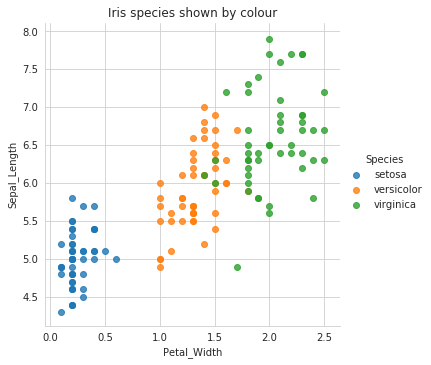

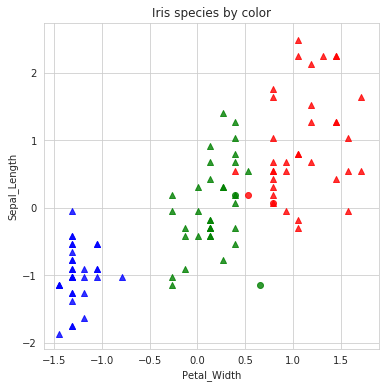

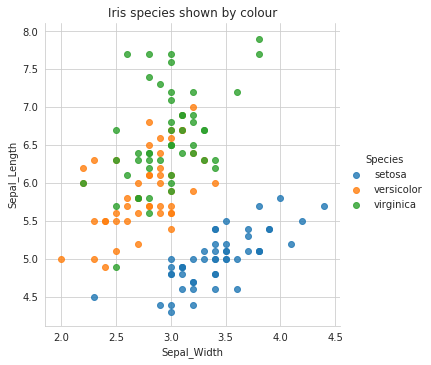

'Done'

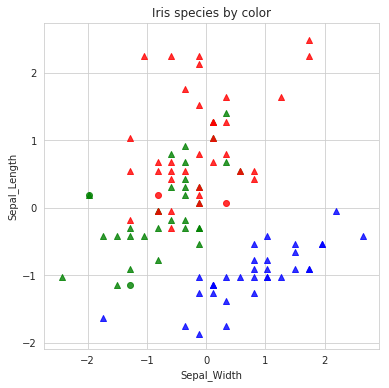

In [11]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1,col2, markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("whitegrid")
    ax = plt.figure(figsize = (6,6)).gca() #define the plot axis
    for m in markers: #iterate over marker dictionary keys
        for c in colors:
            df_temp = df[(df['correct']==m) & (df['Species']==c)]
            sns.regplot(x=col1, y=col2, data= df_temp, fit_reg= False, scatter_kws= {'color':colors[c]}, marker = markers[m], ax = ax)
        
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species by color')
    return 'Done'


def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style("whitegrid")
    sns.lmplot(x= col1, y = col2, data = iris, hue = "Species", fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by colour')
    plt.show()
plot_iris(iris, 'Petal_Width', 'Sepal_Length')
plot_shapes(iris_test,'Petal_Width', 'Sepal_Length',markers, colors)
plot_iris(iris, 'Sepal_Width', 'Sepal_Length')
plot_shapes(iris_test,'Sepal_Width', 'Sepal_Length', markers, colors)

In the plots above color is used to show the predicted class. Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles.